In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Tang do sang cho anh
def IncreaseBrightness (img1d, alpha):
    img1d = [[(255 if pixel[i] + alpha > 255 else 0 if  pixel[i] + alpha < 0 else  pixel[i] + alpha) for i in range(3)] for pixel in img1d]
    return img1d

In [3]:
# Tang do tuong phan cho anh
def IncreaseConstrast (img1d, alpha):
    img1d = [[(pixel[i] * alpha if pixel[i] * alpha < 255 else 255) for i in range(3)] for pixel in img1d]
    return np.array(img1d).astype(int)

In [4]:
# Lat anh ngang doc
def FlipImage (img, axis):
    if axis == 1: # Left-Right
        return np.fliplr(img)
    if axis == 2 : #Up - Down
        return np.flipud(img)

In [5]:
# Chuyen ve anh xam
def GrayScale (img1d) :
    img1d = [[ 0.3 * pixel[0] + 0.59 * pixel[1] + 0.11 * pixel[2] for _ in range(3)] for pixel in img1d]
    return np.array(img1d).astype(int)

In [6]:
# Chong 2 anh cung kich thuoc
def MergeImage(img) :
    img = GrayScale (img) + img
    img = [ [(255 if pixel[i] > 255 else pixel[i]) for i in range(3)] for pixel in img]
    return img

In [7]:
# Lam mo anh
def GaussianBlur(img, blur) :
    (h,w,c) = img.shape
    imgRes = np.zeros ((h,w,c))
    
    rows = len(img)
    cols = len(img[0])

    for row in range(rows):
        for col in range(cols):
            if col - 1 >= 0 and col + 1 < cols and row - 1 >= 0 and row + 1 < rows: 
                imgRes[row][col][0] =  np.sum(np.multiply(blur,img[row - 1 : row + 2, col - 1 : col + 2, 0]))
                imgRes[row][col][1] =  np.sum(np.multiply(blur,img[row - 1 : row + 2, col - 1 : col + 2, 1]))
                imgRes[row][col][2] =  np.sum(np.multiply(blur,img[row - 1 : row + 2, col - 1 : col + 2, 2]))
            else:
                imgRes[row][col] = img[row][col]
    return np.array(imgRes).astype(int)

Enter name of filenamedog.jpg
Choose option to process image:

                0. All function below

                1. Increase brightness

                2. Increase constrast

                3. Flip image

                4. Convert to grey scale

                5. Put 1 image on another with same size

                6. Blur image
                0
Enter brightness scale (0-255): 50
Enter contrast scale : 2
Enter axis you want to flip (1. Left-Right / 2. Up-Down): 2


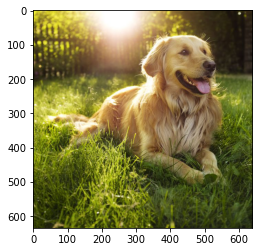

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Main function
fileName = input ("Enter name of filename")

img = Image.open(fileName)
img = np.asarray(img)

(h,w,c) = img.shape
img1d = np.reshape (img, [h*w,c])


message = """Choose option to process image:\n
                0. All function below\n
                1. Increase brightness\n
                2. Increase constrast\n
                3. Flip image\n
                4. Convert to grey scale\n
                5. Put 1 image on another with same size\n
                6. Blur image
                """

option = input (message)

if option == "1":  
    alpha = int(input ("Enter brightness scale: "))
    img1d = IncreaseBrightness(img1d, alpha)
    
if option == "2" :  
    alpha = float (input ("Enter contrast scale : "))
    img1d = IncreaseConstrast(img1d, alpha)

if option == "3" :
    axis = int(input ("Enter axis you want to flip (1. Left-Right / 2. Up-Down): "))
    img = np.reshape(img1d, [h,w,c])
    img1d = FlipImage (img, axis)

if option == "4" :
    img1d = GrayScale (img1d) 

if option == "5" :
    img1d = MergeImage (img1d)

if option == "6" :
    blur = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125], [0.0625, 0.125, 0.0625]])
    img = np.reshape (img1d, [h,w,c])
    img1d = GaussianBlur (img,blur)
    
img = np.reshape (img1d, [h,w,c])
plt.imshow (img)

if option == "0" :
    name = fileName.split('.')

    # Increase brightness
    alpha = int(input ("Enter brightness scale : "))
    img1d_Brightness = IncreaseBrightness(img1d, alpha)
    
    img = np.reshape(img1d_Brightness, [h,w,c])
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save(name[0] + '_brightness.' + name[1])
    
    # Increase constrast
    alpha = float (input ("Enter contrast scale : "))
    img1d_Constrast = IncreaseConstrast(img1d, alpha)
    
    img = np.reshape(img1d_Constrast, [h,w,c])
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save(name[0] + '_constrast.' + name[1])
    
    # Flip image
    axis = int(input ("Enter axis you want to flip (1. Left-Right / 2. Up-Down): "))
    img = np.reshape(img1d, [h,w,c])
    img1d_Flip = FlipImage (img, axis)
    
    img = np.reshape(img1d_Flip, [h,w,c])
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save(name[0] + '_flip.' + name[1])
    
    # Gray scale
    img1d_GrayScale = GrayScale (img1d) 
    
    img = np.reshape(img1d_GrayScale, [h,w,c])
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save(name[0] + '_grayscale.' + name[1])
    
    # Merge imgae
    img1d_Merge = MergeImage (img1d)
    
    img = np.reshape(img1d_Merge, [h,w,c])
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save(name[0] + '_merge.' + name[1])
    
    # Blur
    blur = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125], [0.0625, 0.125, 0.0625]])
    img = np.reshape (img1d, [h,w,c])
    img1d_Blur = GaussianBlur (img,blur)
        
    img = np.reshape(img1d_Blur, [h,w,c])
    PIL_img = Image.fromarray(np.uint8(img))
    PIL_img.save(name[0] + '_blur.' + name[1])
    